In [15]:
import numpy as np
import anndata
import pandas as pd
import scanpy as sc
import scipy
import seaborn as sns

from moscot.problems.time._lineage import TemporalProblem

In [16]:
Path="/home/mgander/Unrelated/moscotTime_Reproducibility/Data"
ts=['E3.5', 'E4.5', 'E5.25', 'E5.5', 'E6.25', 'E6.5', 'E6.75', 'E7.0', 'E7.25', 'E7.5', 'E7.75', 'E8.0', 'E8.25', 'E8.5a', 'E8.5b', 'E9.5', 'E10.5', 'E11.5', 'E12.5', 'E13.5']

# Moscot maps to growth rates

In [17]:
cells=[32, 80, 100, 120, 400, 660, 1720, 4500, 8200, 15000, 30000, 60000, 73000, 90000, 90000, 200000, 1100000, 2600000, 6000000, 13000000]
Cell_number_dict={}
for i in range(20):
    Cell_number_dict[ts[i]]=cells[i]

In [18]:
# Doesn't matter which adata you use to create a tp instance, the result is always the same. I just need one
# to instantiate a tp-problem
adata=sc.read(f"{Path}/anndatas/Comb_anndatas/adata_E3.5_E4.5.h5ad")
tp=TemporalProblem(adata)

Only considering the two last: ['.5', '.h5ad'].
Only considering the two last: ['.5', '.h5ad'].


In [26]:
i=11
ts0=ts[i]
ts1=ts[i+1]
print(f'{ts0} --> {ts1}')
print('------------------------')

E8.0 --> E8.25
------------------------


In [27]:
tp=tp.load(f'{Path}/moscot_maps/{ts0}_{ts1}2_TemporalProblem.pkl')

In [28]:
time_tuple=list(tp.solutions.keys())[0]
gr=tp[time_tuple].solution.a
gr=gr/gr.mean()*Cell_number_dict[ts1]/Cell_number_dict[ts0]

In [29]:
cell_dying=np.sum((1-gr[gr<1]))
apoptosis_rate=float(cell_dying/len(gr))
apoptosis_rate

0.03069205768406391

In [9]:
adata=tp.adata
adata.obs['gr_pr']=tp.prior_growth_rates
adata.obs['gr_po']=tp.posterior_growth_rates
A0=adata[adata.obs['day']==time_tuple[0]].copy()
A0.obs['gr']=gr

In [10]:
#ax=sns.histplot(data=A0.obs, x='gr', hue='cell_type', bins=np.linspace(0,5,201))
#sns.move_legend(ax,(1,0))

In [11]:
cts=list(set(A0.obs['cell_type']))

In [12]:
ns=[]
for ct in cts:
    ns.append(len(A0[A0.obs['cell_type']==ct]))

In [13]:
df=pd.DataFrame({'n':ns, 'ct':cts})
df=df.sort_values('n', ascending=False)
df.index=np.arange(len(df))

In [14]:
dfs=df.iloc[:6]

In [15]:
As=A0[A0.obs['cell_type'].isin(dfs['ct'])]

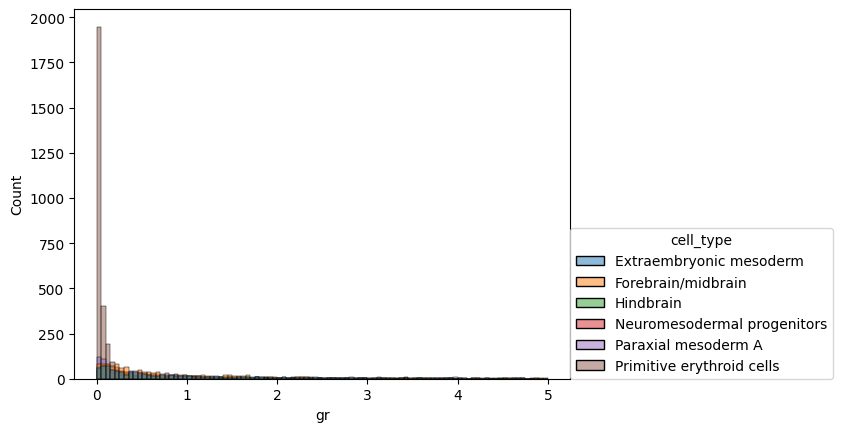

In [16]:
ax=sns.histplot(data=As.obs, x='gr', hue='cell_type', bins=np.linspace(0,5,101))
sns.move_legend(ax,(1,0))

ValueError: Axes(0.125,0.11;0.775x0.77) has no legend attached.

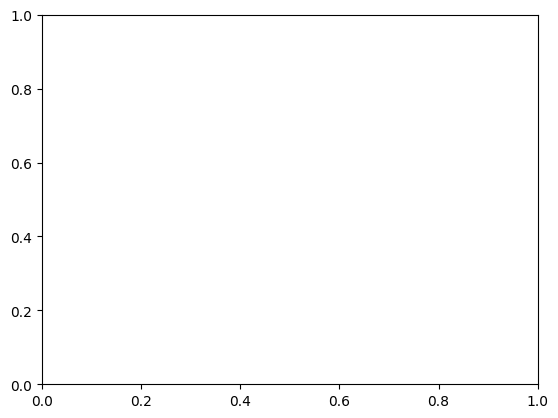

In [38]:
ax=sns.histplot(data=As.obs, x='gr_pr', hue='cell_type', bins=np.linspace(0,3,101))
sns.move_legend(ax,(1,0))

In [546]:
adata

AnnData object with n_obs × n_vars = 16824 × 29452
    obs: 'cellID', 'day', 'cell_state', 'cell_type', 'group', 'sample', 'origin', 'proliferation', 'apoptosis', 'gr_pr', 'gr_po'
    var: 'features', 'gene_names'
    obsm: 'X_pcaS', 'X_umap3'

In [337]:
adata.obs

,cellID,day,cell_state,cell_type,group,sample,origin,proliferation,apoptosis,gr_pr,gr_po
cell_30635,cell_30635,8.00,E8:Caudal neuroectoderm,Caudal neuroectoderm,2,cell_30635,Pijuan,0.260485,0.034528,1.539916,3.816089
cell_30636,cell_30636,8.00,E8:Paraxial mesoderm A,Paraxial mesoderm A,2,cell_30636,Pijuan,0.241697,0.040115,1.422081,2.891842
cell_30638,cell_30638,8.00,E8:Surface ectoderm,Surface ectoderm,2,cell_30638,Pijuan,0.181482,0.066780,1.037858,3.154767
cell_30639,cell_30639,8.00,E8:Caudal lateral epiblast,Caudal lateral epiblast,2,cell_30639,Pijuan,0.276569,0.079271,1.242563,2.264359
cell_30642,cell_30642,8.00,E8:Splanchnic mesoderm,Splanchnic mesoderm,2,cell_30642,Pijuan,0.268484,0.008921,1.744938,3.752757
...,...,...,...,...,...,...,...,...,...,...,...
cell_95722,cell_95722,8.25,E8.25:Splanchnic mesoderm,Splanchnic mesoderm,1,cell_95722,Pijuan,0.153689,0.057125,NaN,NaN
cell_95723,cell_95723,8.25,E8.25:Paraxial mesoderm A,Paraxial mesoderm A,1,cell_95723,Pijuan,0.162054,0.098392,NaN,NaN
cell_95724,cell_95724,8.25,E8.25:Extraembryonic ectoderm,Extraembryonic ectoderm,1,cell_95724,Pijuan,0.251958,0.071817,NaN,NaN
cell_95725,cell_95725,8.25,E8.25:Splanchnic mesoderm,Splanchnic mesoderm,1,cell_95725,Pijuan,0.182309,0.051910,NaN,NaN


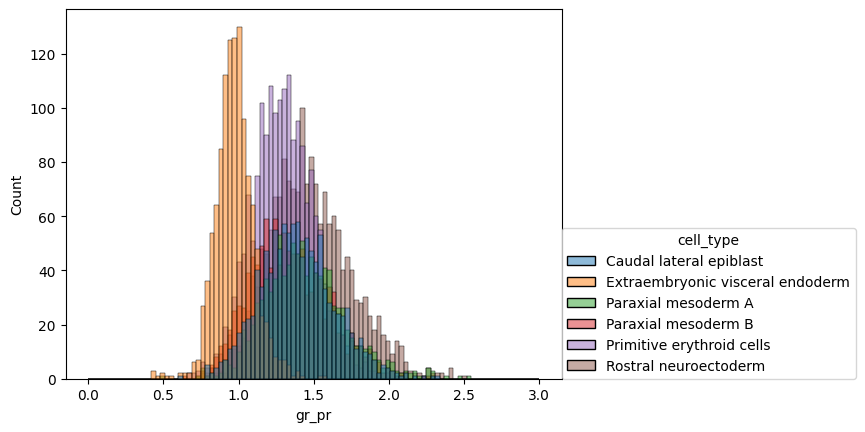

In [245]:
ax=sns.histplot(data=As.obs, x='gr_pr', hue='cell_type', bins=np.linspace(0,3,101))
sns.move_legend(ax,(1,0))

In [230]:
tp.prior_growth_rates

,prior_growth_rates
cell_30635,1.539916
cell_30636,1.422081
cell_30638,1.037858
cell_30639,1.242563
cell_30642,1.744938
...,...
cell_95722,NaN
cell_95723,NaN
cell_95724,NaN
cell_95725,NaN


In [246]:
tp.prior_growth_rates

,prior_growth_rates
cell_30635,1.539916
cell_30636,1.422081
cell_30638,1.037858
cell_30639,1.242563
cell_30642,1.744938
...,...
cell_95722,NaN
cell_95723,NaN
cell_95724,NaN
cell_95725,NaN


In [232]:
adata.obs

,cellID,day,cell_state,cell_type,group,sample,origin,proliferation,apoptosis,gr_pr,gr_po
cell_30635,cell_30635,8.00,E8:Caudal neuroectoderm,Caudal neuroectoderm,2,cell_30635,Pijuan,0.260485,0.034528,1.539916,1.898174
cell_30636,cell_30636,8.00,E8:Paraxial mesoderm A,Paraxial mesoderm A,2,cell_30636,Pijuan,0.241697,0.040115,1.422081,1.813372
cell_30638,cell_30638,8.00,E8:Surface ectoderm,Surface ectoderm,2,cell_30638,Pijuan,0.181482,0.066780,1.037858,1.246302
cell_30639,cell_30639,8.00,E8:Caudal lateral epiblast,Caudal lateral epiblast,2,cell_30639,Pijuan,0.276569,0.079271,1.242563,1.503402
cell_30642,cell_30642,8.00,E8:Splanchnic mesoderm,Splanchnic mesoderm,2,cell_30642,Pijuan,0.268484,0.008921,1.744938,2.257906
...,...,...,...,...,...,...,...,...,...,...,...
cell_95722,cell_95722,8.25,E8.25:Splanchnic mesoderm,Splanchnic mesoderm,1,cell_95722,Pijuan,0.153689,0.057125,NaN,NaN
cell_95723,cell_95723,8.25,E8.25:Paraxial mesoderm A,Paraxial mesoderm A,1,cell_95723,Pijuan,0.162054,0.098392,NaN,NaN
cell_95724,cell_95724,8.25,E8.25:Extraembryonic ectoderm,Extraembryonic ectoderm,1,cell_95724,Pijuan,0.251958,0.071817,NaN,NaN
cell_95725,cell_95725,8.25,E8.25:Splanchnic mesoderm,Splanchnic mesoderm,1,cell_95725,Pijuan,0.182309,0.051910,NaN,NaN


In [199]:
tp.prior_growth_rates

,prior_growth_rates
cell_30635,1.539916
cell_30636,1.422081
cell_30638,1.037858
cell_30639,1.242563
cell_30642,1.744938
...,...
cell_95722,NaN
cell_95723,NaN
cell_95724,NaN
cell_95725,NaN


In [ ]:
**(time_tuple[1]-time_tuple[0])

In [200]:
time_tuple[1]-time_tuple[0]

0.25

In [182]:
tp.posterior_growth_rates

,posterior_growth_rates
cell_30635,4.312301
cell_30636,3.210051
cell_30638,4.288957
cell_30639,2.216922
cell_30642,4.081030
...,...
cell_95722,NaN
cell_95723,NaN
cell_95724,NaN
cell_95725,NaN


In [ ]:
epsilon=0.005
ap_min=0.02
ap_max=0.04

for i in range(19):
    ts0=ts[i]
    ts1=ts[i+1]
    print(ts0)
    
    tp=tp.load(f'{Path}/moscot_maps/{ts0}_{epsilon}_{ap_min}_{ap_max}_TemporalProblem.pkl')
    time_tuple=list(tp.solutions.keys())[0]
    gr=tp[time_tuple].solution.a
    gr=gr/gr.mean()*Cell_number_dict[ts1]/Cell_number_dict[ts0]
    np.save(f'{Path}/moscot_maps/{ts0}_growth_rates.npy', gr)